<a href="https://colab.research.google.com/github/LinggarM/Transformers-1.0/blob/master/Transformers_1_0_cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [4]:
pip install Sastrawi

In [5]:
pip install tensorflow_text

In [6]:
pip install transformers

In [7]:
pip install xlsxwriter

In [8]:
import numpy as np
import pandas as pd
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import transformers
from gensim.models import Word2Vec
import gensim.models
import tensorflow_hub as hub
import tensorflow_text
import tensorflow as tf
from keras import backend as K
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv1D, Bidirectional, LSTM, GRU, Flatten, Dense, Dropout, Lambda
from keras.layers.merge import concatenate
import matplotlib.pyplot as plt

# Import Data
Menggunakan Ukara Dataset (https://github.com/aliakbars/ukara)

**Output :**
*   pertanyaan (string)
*   jawaban (list)
*   score (list)
*   id_mahasiswa (numpy array)

In [26]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [27]:
path = "/content/gdrive/MyDrive/Upload/Machine Learning/Projects/Transformers 1.0/Data/Dummy Data"

# Data A
data_pertanyaan_a = f"{path}/Data A/stimulus dan coding guidelines data A.txt"
data_train_a = f"{path}/Data A/data_train_A.csv"
data_dev_a = f"{path}/Data A/data_dev_A.csv"

# Data B
data_pertanyaan_b = f"{path}/Data B/stimulus dan coding guidelines data B.txt"
data_train_b = f"{path}/Data B/data_train_B.csv"
data_dev_b = f"{path}/Data B/data_dev_B.csv"

In [28]:
# Data A
pertanyaan_a = open(data_pertanyaan_a, "r+").read()
df_train_a = pd.read_csv(data_train_a)
df_test_a = pd.read_csv(data_dev_a)

# Data B
pertanyaan_b = open(data_pertanyaan_b, "r+").read()
df_train_b = pd.read_csv(data_train_b)
df_test_b = pd.read_csv(data_dev_b)

## Data Preview

### Data A

In [29]:
# Pertanyaan
print(pertanyaan_a)

---------------------------------------------------------------------------------------------------------------------------------------------
STIMULUS
---------------------------------------------------------------------------------------------------------------------------------------------
Pemanasan global terjadi karena peningkatan produksi karbon dioksida yang dihasilkan oleh pembakaran fosil dan konsumsi bahan bakar yang tinggi. Salah satu akibat adalah mencairnya es abadi di kutub utara dan selatan yang menimbulkan naiknya ketinggian air laut. kenaikan air laut akan terjadi terus menerus meskipun dalam hitungan centimeter akan mengakibatkan perubahan yang signifikan.

Film “Waterworld”, adalah film fiksi ilmiah yang menunjukkan akibat adanya pemanasan global yang sangat besar sehingga menyebabkan bumi menjadi tertutup oleh lautan. Negara-negara dan daratan yang dulunya kering menjadi tengelamn karena terjadi kenaikan permukaan air laut. Penduduk yang dulunya bisa berkehidupan beb

In [30]:
df_train_a.head()

,RES_ID,RESPONSE,LABEL
0,TRA1,intetraksi/beradaptasi terhadap lingkungan yan...,1
1,TRA2,seperti jatuhnya meteor tsunami gempa bumi,0
2,TRA3,hanya tuhan yang tahu tantangan nya itu apaan,0
3,TRA4,mereka akan sulit beradaptasi,1
4,TRA5,"Tempat tinggal, ekonomi, dan pekerjaan",1


In [31]:
df_train_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RES_ID    268 non-null    object
 1   RESPONSE  268 non-null    object
 2   LABEL     268 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 6.4+ KB


In [32]:
df_test_a.head()

,RES_ID,RESPONSE
0,DEVA1,karena di tempat tnggalnya tidak aman karena b...
1,DEVA2,"banyak yang menolak, susah mencari lapangan pe..."
2,DEVA3,ah berkomunikasi dengan wilyah yang mereka tem...
3,DEVA4,"tantangan yang akan mereka hadapi, seperti mer..."
4,DEVA5,Mereka akan tidak terbiasa dengan tempat baru


In [33]:
df_test_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RES_ID    215 non-null    object
 1   RESPONSE  215 non-null    object
dtypes: object(2)
memory usage: 3.5+ KB


### Data B

In [34]:
# Pertanyaan
print(pertanyaan_b)

---------------------------------------------------------------------------------------------------------------------------------------------
STIMULUS
---------------------------------------------------------------------------------------------------------------------------------------------
Sebuah toko baju berkonsep self-service menawarkan promosi dua buah baju bertema tahun baru seharga Rp50.000,00. sebelum baju bertema tahun baru dibagikan kepada pembeli, sebuah layar akan menampilkan tampilan gambar yang menampilkan kondisi kerja di dalam sebuah pabrik konveksi/pembuatan baju. Kemudian pembeli diberi program pilihan untuk menyelesaikan pembeliannya atau menyumpangkan Rp50.000,00 untuk dijadikan donasi pembagian baju musim dingin di suatu daerah yang membutuhkan. Delapan dari sepuluh pembeli memilih untuk memberikan donasi.
Menurut anda mengapa banyak dari pembeli yang memilih berdonasi?

----------------------------------------------------------------------------------------------

In [35]:
df_train_b.head()

,RES_ID,RESPONSE,LABEL
0,TRB1,Karena orang berpikir bahwa jika disumbangkan ...,1
1,TRB2,Pakaian awet adalah alternatif terhadap Fast F...,0
2,TRB3,karna orang lebih suka menyumbang,1
3,TRB4,karana harga nya terjangkau dan pas.,0
4,TRB5,kerena harganya mahal .,0


In [36]:
df_train_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RES_ID    305 non-null    object
 1   RESPONSE  305 non-null    object
 2   LABEL     305 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 7.3+ KB


In [37]:
df_test_b.head()

,RES_ID,RESPONSE
0,DEVB1,karena jika menyumbangkan pakaian itu pakaian ...
1,DEVB2,memastikan bahwa ppenerima akan senang dan yg ...
2,DEVB3,karena banyak orang yang mendukung hal tersebu...
3,DEVB4,karena banayak orang yang ada atau bekerja di ...
4,DEVB5,karna sebagian orang ada yang ingin beramal da...


In [38]:
df_test_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RES_ID    244 non-null    object
 1   RESPONSE  244 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


## Set Data
Inisialisasi data yang akan digunakan

In [39]:
# Pertanyaan
pertanyaan = "Sebuah toko baju berkonsep self-service menawarkan promosi dua buah baju bertema tahun baru seharga Rp50.000,00. sebelum baju bertema tahun baru dibagikan kepada pembeli, sebuah layar akan menampilkan tampilan gambar yang menampilkan kondisi kerja di dalam sebuah pabrik konveksi/pembuatan baju. Kemudian pembeli diberi program pilihan untuk menyelesaikan pembeliannya atau menyumpangkan Rp50.000,00 untuk dijadikan donasi pembagian baju musim dingin di suatu daerah yang membutuhkan. Delapan dari sepuluh pembeli memilih untuk memberikan donasi. Menurut anda mengapa banyak dari pembeli yang memilih berdonasi?"

In [40]:
# Jawaban
jawaban = df_train_b['RESPONSE'].tolist()

In [41]:
# Score (Label)
score = df_train_b['LABEL'].tolist()

In [42]:
# Set ID Mahasiswa (Random)
id_mahasiswa = np.arange(len(jawaban))

### Preview

In [43]:
# Preview Pertanyaan
pertanyaan

'Sebuah toko baju berkonsep self-service menawarkan promosi dua buah baju bertema tahun baru seharga Rp50.000,00. sebelum baju bertema tahun baru dibagikan kepada pembeli, sebuah layar akan menampilkan tampilan gambar yang menampilkan kondisi kerja di dalam sebuah pabrik konveksi/pembuatan baju. Kemudian pembeli diberi program pilihan untuk menyelesaikan pembeliannya atau menyumpangkan Rp50.000,00 untuk dijadikan donasi pembagian baju musim dingin di suatu daerah yang membutuhkan. Delapan dari sepuluh pembeli memilih untuk memberikan donasi. Menurut anda mengapa banyak dari pembeli yang memilih berdonasi?'

In [44]:
# Preview Jawaban
jawaban[:5]

['Karena orang berpikir bahwa jika disumbangkan akan membuat produksi pakaian menjadi lebih beretika',
 'Pakaian awet adalah alternatif terhadap Fast Fashion. Pakaian awet lebih mahal biaya produksi dan harga belinya, tetapi karena pakaian itu dibuat untuk bertahan lebih lama, maka yang dibuat pun menjadi lebih sedikit. Kita sebagai konsumen harus menolak tren Fast Fashion dan membeli pakaian yang lebih awet dan dibuat sesuai etika.',
 'karna orang lebih suka menyumbang',
 'karana harga nya terjangkau dan pas.',
 'kerena harganya mahal .']

In [45]:
# Preview Score
score[:5]

[1, 0, 1, 0, 0]

In [46]:
# Preview ID Mahasiswa
id_mahasiswa

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

# Data Preprocessing
Untuk Embedding selain BERT 

**Output :**
*   pertanyaan_padded (numpy array) : 1, 130
*   jawaban_padded (numpy array) : 305, 130



## Case Folding

In [ ]:
# Case Folding
pertanyaan_cased = pertanyaan.lower()
jawaban_cased = [i.lower() for i in jawaban]

## Filtering

In [ ]:
# Create Remover
factory = StopWordRemoverFactory()
remover = factory.create_stop_word_remover()

# Stopword Removal
pertanyaan_filtered = remover.remove(pertanyaan_cased)
jawaban_filtered = [remover.remove(i) for i in jawaban_cased]

# Filter Whitespace and Alphanumeric
pertanyaan_filtered = re.sub(r'[^\w\s]','', pertanyaan_filtered)
jawaban_filtered = [re.sub(r'[^\w\s]','', i) for i in jawaban_filtered]

# Filter Number
pertanyaan_filtered = re.sub(r'[\d]','', pertanyaan_filtered)
jawaban_filtered = [re.sub(r'[\d]','', i) for i in jawaban_filtered]

## Stemming

In [ ]:
# Create Stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Stemming
pertanyaan_stemmed = stemmer.stem(pertanyaan_filtered)
jawaban_stemmed = [stemmer.stem(i) for i in jawaban_filtered]

## Tokenization & Vectorization

In [ ]:
# Create Corpus
corpus = [pertanyaan_stemmed] + jawaban_stemmed

# Create Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

# Tokenization & Vectorization
pertanyaan_tokenized = tokenizer.texts_to_sequences([pertanyaan_stemmed])
jawaban_tokenized = tokenizer.texts_to_sequences(jawaban_stemmed)

In [ ]:
# Get Vocabulary Length
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# Get Max Length (For Padding)
max_length = 0
for i in jawaban_tokenized :
  if len(i) > max_length :
    max_length = len(i)

## Padding

In [ ]:
# Padding
pertanyaan_padded = pad_sequences(pertanyaan_tokenized, maxlen = max_length, padding = "post")
jawaban_padded = pad_sequences(jawaban_tokenized, maxlen = max_length, padding = "post")

# Feature Engineering (Word Embedding)

**Output :**
*   IndoBERT
> * pertanyaan_results : TensorShape([1, 204, 768])
> * jawaban_results : TensorShape([305, 204, 768])
*   BERT
> * pertanyaan_results : 1, 128, 768
> * jawaban_results : 305, 128, 768
*   Word2vec :
> * pertanyaan_results : 1, 130, 400
> * jawaban_results : 305, 130, 400



## IndoBERT

In [23]:
# Import Tokenizer & IndoBERT Model
tokenizer = transformers.BertTokenizer.from_pretrained("indobenchmark/indobert-base-p1", do_lower_case=True)
bert_model = transformers.TFBertModel.from_pretrained("indobenchmark/indobert-base-p1")

Some layers from the model checkpoint at indobenchmark/indobert-base-p1 were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at indobenchmark/indobert-base-p1.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [63]:
# Create the model under a distribution strategy scope.
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
  # Preprocessing
  jawaban_enc = tokenizer(jawaban, padding = 'longest', return_tensors="tf")
  pertanyaan_enc = tokenizer(pertanyaan, max_length = len(jawaban_enc['input_ids'][0]), padding= 'max_length', return_tensors="tf")

  # Embedding
  pertanyaan_results = bert_model(pertanyaan_enc)['last_hidden_state']
  jawaban_results = bert_model(jawaban_enc)['last_hidden_state']

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


## BERT

In [ ]:
# Choose BERT model
bert_model_name = 'bert_multi_cased_L-12_H-768_A-12' 

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3


In [ ]:
# Set preprocess & encoding model
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
# Data Preprocessing
pertanyaan_preprocessed = bert_preprocess_model([pertanyaan])
jawaban_preprocessed = bert_preprocess_model(jawaban)

# Word Embedding
pertanyaan_results = bert_model(pertanyaan_preprocessed)
jawaban_results = bert_model(jawaban_preprocessed)

# Final Embedding (['sequence_output'])
pertanyaan_results = pertanyaan_results['sequence_output']
jawaban_results = jawaban_results['sequence_output']

## Word2vec

### Self-Train Model

#### Build Vocabulary

In [ ]:
# Vocabulary Initialization
vocab = []

# Build Vocabulary (Jawaban)
for i in jawaban_padded :
  vocab_now = [tokenizer.index_word[j] for j in i if (j != 0)]
  vocab.append(vocab_now)

# Build Vocabulary (Pertanyaan)
vocab_now = [tokenizer.index_word[j] for j in pertanyaan_padded[0] if (j != 0)]
vocab.append(vocab_now)

#### Model Training

In [ ]:
# Set Embedding Size
embed_size = 300

# Train Word2Vec
word2vec_model = Word2Vec(vocab, size = embed_size, window = 3, workers = 3, sg = 1, hs = 1, min_count = 0)

# Set Word Vectors
word_vectors = word2vec_model.wv

#### Create Embedding Matrix

In [ ]:
# Initilization with numpy zeros
embedding_matrix = np.zeros((vocab_size, embed_size))

# Assign every word vectors in tokenizer to embedding matrix
for word, i in tokenizer.word_index.items():
    try :
      embedding_vector = word_vectors.get_vector(word)
      if embedding_vector is not None:
          embedding_matrix[i] = embedding_vector
    except :
      print(word, "not in vocabulary")

#### Encode

In [ ]:
# Embed Pertanyaan
pertanyaan_results = np.array([embedding_matrix[i] for i in pertanyaan_padded])

# Embed Jawaban
jawaban_results = []
for i in jawaban_padded :
  embed_now = [embedding_matrix[j] for j in i]
  jawaban_results.append(embed_now)
jawaban_results = np.array(jawaban_results)

### Pretrained Model

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download bhimantoros/pretrained-word2vec-indonesia
! unzip "pretrained-word2vec-indonesia.zip"

100% 2.97G/2.97G [00:35<00:00, 74.8MB/s]
100% 2.97G/2.97G [00:35<00:00, 89.4MB/s]
Archive:  pretrained-word2vec-indonesia.zip
  inflating: idwiki-latest-pages-articles.xml.bz2  
  inflating: wiki.id.case.model      
  inflating: wiki.id.case.model.syn1neg.npy  
  inflating: wiki.id.case.model.wv.vectors.npy  
  inflating: wiki.id.case.txt        
  inflating: wiki.id.case.vector     


#### Load Pre-trained Model

In [ ]:
# Get Pre-train Word2Vec
word2vec_model = "wiki.id.case.vector"
word_vectors = gensim.models.KeyedVectors.load_word2vec_format(word2vec_model, binary=False)

# Get Embedding Size
embed_size = len(word_vectors.get_vector(word_vectors.index2word[0]))

#### Create Embedding Matrix

In [ ]:
# Initilization with numpy zeros
embedding_matrix = np.zeros((vocab_size, embed_size))

# Assign every word vectors in tokenizer to embedding matrix
for word, i in tokenizer.word_index.items():
    try :
      embedding_vector = word_vectors.get_vector(word)
      if embedding_vector is not None:
          embedding_matrix[i] = embedding_vector
    except :
      print(word, "not in vocabulary")

eksperiman not in vocabulary
krena not in vocabulary
pakaianpakaian not in vocabulary
pabrikpabrik not in vocabulary
timpal not in vocabulary
pakian not in vocabulary
prokduksi not in vocabulary
selfservice not in vocabulary
konveksipembuatan not in vocabulary
menyumpangkan not in vocabulary
adasedangkan not in vocabulary
seharihari not in vocabulary
sodaqoh not in vocabulary
bererja not in vocabulary
mubasir not in vocabulary
t not in vocabulary
sumumbangkan not in vocabulary
begtu not in vocabulary
prodeuksi not in vocabulary
ksarena not in vocabulary
smapah not in vocabulary
pakaiansehingga not in vocabulary
terseebut not in vocabulary
disumbangmenyumbang not in vocabulary
lbih not in vocabulary
pakainan not in vocabulary
karenaorangorang not in vocabulary
simpat not in vocabulary
pabrib not in vocabulary
pakaisehingga not in vocabulary
aripada not in vocabulary
memilioh not in vocabulary
menyumangkan not in vocabulary
muas not in vocabulary
erti not in vocabulary
mengiklaskan not i

#### Encode

In [ ]:
# Embed Pertanyaan
pertanyaan_results = np.array([embedding_matrix[i] for i in pertanyaan_padded])

# Embed Jawaban
jawaban_results = []
for i in jawaban_padded :
  embed_now = [embedding_matrix[j] for j in i]
  jawaban_results.append(embed_now)
jawaban_results = np.array(jawaban_results)

# Measure Distance
**Output :**
*   idx_sorted (list) : index of sorted answers distance (ascending)


## Define function
Cosine Similarity with Average Pooling

In [66]:
def avgPooling(x) :
    return K.mean(K.constant(x), axis=1, keepdims=False)

def cosineSimilarity(x, y) :
    normalize_a = tf.nn.l2_normalize(x,0)        
    normalize_b = tf.nn.l2_normalize(y,0)
    cos_similarity = tf.reduce_sum(tf.multiply(normalize_a,normalize_b))
    return float(cos_similarity)

## Get Distance List

### BERT

In [67]:
# Distance list initialization
dist_list = []

# Get vector pertanyaan
pertanyaan_vectors = np.array(pertanyaan_results).squeeze(axis = 0)

# Measure distance
for i in jawaban_results :
  dist = cosineSimilarity(avgPooling(pertanyaan_vectors), avgPooling(i))
  dist_list.append(dist)

### Word2vec

In [ ]:
# Distance list initialization
dist_list = []

# Get vector pertanyaan
pertanyaan_vectors = np.array([embedding_matrix[i] for i in pertanyaan_padded]).squeeze(axis = 0)

# Measure distance
for i in jawaban_padded :
  jawaban_vectors = np.array([embedding_matrix[j] for j in i])
  dist = cosineSimilarity(avgPooling(pertanyaan_vectors), avgPooling(jawaban_vectors))
  dist_list.append(dist)

## Sort Distance (Ascending)

In [68]:
idx_sorted = np.argsort(dist_list)

In [69]:
# Distance Preview
for i in idx_sorted :
  print(dist_list[i])

-0.4342612624168396
-0.42439907789230347
-0.30615895986557007
-0.2914940118789673
-0.23997405171394348
-0.21991091966629028
-0.19664216041564941
-0.1717662215232849
-0.15955573320388794
-0.13815759122371674
-0.1337941735982895
-0.12390104681253433
-0.11469621956348419
-0.11345846951007843
-0.11191226541996002
-0.07922637462615967
-0.07685914635658264
-0.04016534984111786
-0.033933915197849274
-0.03233054652810097
-0.024198096245527267
-0.022700315341353416
-0.02182847075164318
-0.019638599827885628
-0.0034094545990228653
-0.0008133435621857643
-0.0008133435621857643
0.0004333937540650368
0.015831051394343376
0.01777110993862152
0.028851469978690147
0.030818689614534378
0.03286271169781685
0.047718726098537445
0.05574814975261688
0.06868155300617218
0.08852505683898926
0.08870527893304825
0.09141213446855545
0.09512156993150711
0.10543270409107208
0.11077258735895157
0.11149099469184875
0.11210884898900986
0.11967094987630844
0.12444169819355011
0.12494799494743347
0.13014551997184753
0

In [ ]:
# Answers Preview (Sorted)
for i in idx_sorted :
  print(jawaban[i])

karenakasian
karena bnyak yang membutuh kan
karena dia kasihan
mereka memiliki rasa kepedulian terhadap sesama.
krena menyun bang itu berpahala
Karena melihat kondisi para pegawai
krena mungkin kekecilan /kebesaran
karena,mereka ingin ada produk pakaian yang lebih beretika.
karena tidak terpakai
karena mendapatkan pahala
karna berbagi itu indah
KARENA PRIHATIN MELIHAT KEADAAN PARA PEKERJA PABRIK
karena banyak yang membutuhkan
karna menyumbang adalah bekal untuk menuju surga
sebab untuk membantu produktivitas suatu pabrik
karena pakaian itu beretika
karena lebih bermanfaat.
karena lebih mudah
memilih
karena'pakaianawetlebihmahal.
jihydgsjdisadusdtgwtsfdhs
dikarenakan
karena dengan menyumbang produsen akan mengondisikan kerja disebuah pabrik
meemas tikan bahwA pejerja mendapatkan upah layak
karena, pakaiannya akan menjadi lebih beretika
karena pakain tersebut tidak layak untuk dipakai
karena kalau dibuang dapat merugikan,makanya sebagian besar orang menyumbangkannya.
karna untuk sedekah


# Choose Data to be Labeled
**Output :**
*   idx_labeled (list)



## Set n Data

In [70]:
# Set Percentage
percentage = 20

# n labeled
n_labeled = int(percentage/100 * len(jawaban))

# Auto set to 3
if (n_labeled < 3) :
  n_labeled = 3

# Set the amount of data for each section
n_each = int(n_labeled / 3)

# If there is excess data
exc = n_labeled % 3
extra_top = 0
extra_bottom = 0
if (exc) > 0 :
  extra_top += 1
  if exc == 2 :
    extra_bottom += 1

## Get Data Index

In [73]:
# Top
idx_top = [idx_sorted[i] for i in range(n_each + extra_top)]

# Middle
start_idx = int((len(jawaban)/2) - (n_each/2))
idx_middle = [idx_sorted[start_idx + i] for i in range(n_each)]

# Bottom
idx_bottom = [np.flip(idx_sorted)[i] for i in range(n_each + extra_bottom)]

# Combine
idx_labeled = idx_top + idx_middle + idx_bottom

# Define Data
For Training & Testing

In [74]:
# Training Data
pertanyaan_train = np.array([pertanyaan_vectors for i in range(len(idx_labeled))])
x_train = np.array([jawaban_results[i] for i in idx_labeled])
y_train = np.array([score[i] for i in idx_labeled])

# Get Index of Testing Data
idx_test = [i for i in idx_sorted if i not in idx_labeled]

# Testing Data
pertanyaan_test = np.array([pertanyaan_vectors for i in range(len(idx_test))])
x_test = np.array([jawaban_results[i] for i in idx_test])
y_test = np.array([score[i] for i in idx_test])

In [75]:
print("Shape of Train Data :")
print(pertanyaan_train.shape)
print(x_train.shape)
print(y_train.shape)

print("\nShape of Test Data :")
print(pertanyaan_test.shape)
print(x_test.shape)
print(y_test.shape)

Shape of Train Data :
(61, 204, 768)
(61, 204, 768)
(61,)

Shape of Test Data :
(244, 204, 768)
(244, 204, 768)
(244,)


# Model Building

## Define Cosine Similarity Layer

In [76]:
def cosine_distance(vests):
    x, y = vests
    x = K.l2_normalize(x, axis=-1)
    y = K.l2_normalize(y, axis=-1)
    return -K.mean(x * y, axis=-1, keepdims=True)

def cos_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

# CNN-LSTM

## Architecture Building

In [77]:
def getCNNLSTMModel(
    filters = 64, 
    kernel_size = 3, 
    lstm_units = 128, 
    lstm_dropout = 0.4, 
    lstm_recurrent_dropout = 0.4, 
    dropout = 0.4) :
  
  left_input = Input(pertanyaan_train[0].shape)
  right_input = Input(x_train[0].shape)
  
  conv_layer = Conv1D(filters = filters, kernel_size = kernel_size, padding='same', strides = 1)
  lstm_layer = LSTM(units = lstm_units, dropout = lstm_dropout, recurrent_dropout = lstm_recurrent_dropout, return_sequences=False)
  dropout_layer = Dropout(dropout)

  question_encoding = dropout_layer(lstm_layer(conv_layer(left_input)))
  answer_encoding = dropout_layer(lstm_layer(conv_layer(right_input)))

  # output_model = Lambda(cosine_distance, output_shape = cos_dist_output_shape)([question_encoding, answer_encoding])
  output_model = concatenate([question_encoding, answer_encoding])
  output_model = Dense(1)(output_model)

  model = Model(inputs = [left_input, right_input], outputs = [output_model])

  model.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['mae', 'mse'])
  model.summary()

  return model

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 204, 768)]   0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 204, 768)]   0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 204, 64)      147520      ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 128)          98816       ['conv1d[0][0]',             

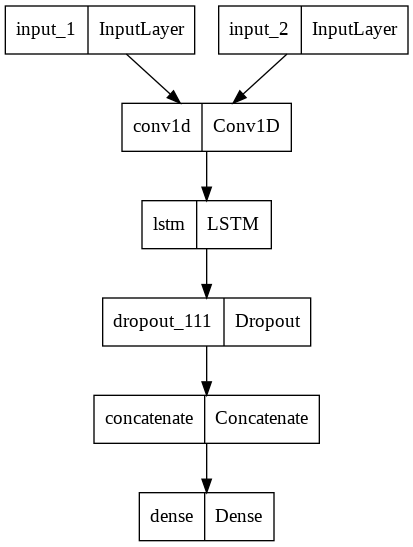

In [78]:
cnn_lstm_model = getCNNLSTMModel()
tf.keras.utils.plot_model(cnn_lstm_model, to_file='cnn_lstm_model.png')

## Model Training

In [79]:
history = cnn_lstm_model.fit([pertanyaan_train, x_train],
                    y_train,
                    validation_data = [[pertanyaan_test, x_test], y_test],
                    epochs = 100)

Epoch 1/100
2/2 [==============================] - 10s 3s/step - loss: 2.5375 - mae: 1.3794 - mse: 2.5375 - val_loss: 0.3697 - val_mae: 0.4765 - val_mse: 0.3697
Epoch 2/100
2/2 [==============================] - 4s 2s/step - loss: 0.7215 - mae: 0.7010 - mse: 0.7215 - val_loss: 0.7621 - val_mae: 0.7208 - val_mse: 0.7621
Epoch 3/100
2/2 [==============================] - 4s 2s/step - loss: 0.4940 - mae: 0.5790 - mse: 0.4940 - val_loss: 0.2414 - val_mae: 0.4558 - val_mse: 0.2414
Epoch 4/100
2/2 [==============================] - 4s 3s/step - loss: 0.2850 - mae: 0.4448 - mse: 0.2850 - val_loss: 0.4647 - val_mae: 0.5288 - val_mse: 0.4647
Epoch 5/100
2/2 [==============================] - 4s 3s/step - loss: 0.3654 - mae: 0.4971 - mse: 0.3654 - val_loss: 0.4417 - val_mae: 0.5108 - val_mse: 0.4417
Epoch 6/100
2/2 [==============================] - 4s 3s/step - loss: 0.4138 - mae: 0.5210 - mse: 0.4138 - val_loss: 0.2472 - val_mae: 0.4361 - val_mse: 0.2472
Epoch 7/100
2/2 [======================

## Bayesian Optimization

In [ ]:
# Set Hyperparameters
filters = [64, 128, 256]
kernel_size = [3, 5, 10]
lstm_units = [64, 128, 256]
lstm_dropout = [0.2, 0.3, 0.4, 0.5]
lstm_recurrent_dropout = [0.2, 0.3, 0.4, 0.5]
dropout = [0.2, 0.3, 0.4, 0.5]
epochs = [25, 50, 75, 100]

# Train The Model
cnn_lstm_model = getCNNLSTMModel(
    filters = 128, 
    kernel_size = 3, 
    lstm_units = 128, 
    lstm_dropout = 0.4, 
    lstm_recurrent_dropout = 0.4, 
    dropout = 0.4)
history = cnn_lstm_model.fit([pertanyaan_train, x_train],
                    y_train,
                    validation_data = [[pertanyaan_test, x_test], y_test],
                    epochs = epochs)

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 128, 768)]   0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 128, 768)]   0           []                               
                                                                                                  
 conv1d_5 (Conv1D)              (None, 128, 128)     491648      ['input_11[0][0]',               
                                                                  'input_12[0][0]']               
                                                                                                  
 lstm_5 (LSTM)                  (None, 128)          131584      ['conv1d_5[0][0]',         

## Result Visualization

### Training

Text(0, 0.5, 'Loss')

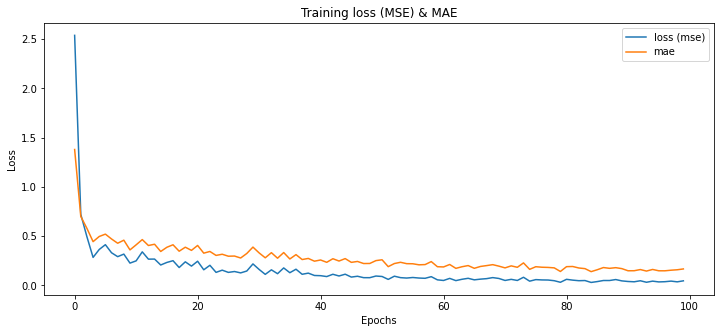

In [80]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['mae'])
plt.legend(['loss (mse)', 'mae'])
plt.title('Training loss (MSE) & MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')

### Testing

Text(0, 0.5, 'Loss')

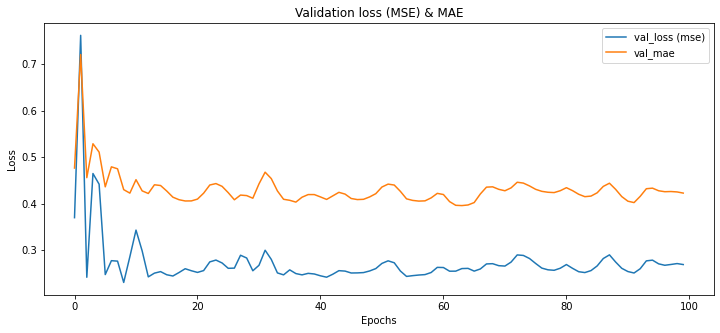

In [81]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_mae'])
plt.legend(['val_loss (mse)', 'val_mae'])
plt.title('Validation loss (MSE) & MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')

## Evaluation

In [82]:
# MSE & MAE
loss, mae, mse = cnn_lstm_model.evaluate([pertanyaan_test, x_test], y_test)
print("Loss (MSE): ", loss)
print("MAE: ", mae)

8/8 [==============================] - 1s 173ms/step - loss: 0.2688 - mae: 0.4226 - mse: 0.2688
Loss (MSE):  0.26877743005752563
MAE:  0.42259272933006287


In [86]:
# Accuracy All Data
n_true = 0
for i in range(len(df_final)) :
  if (df_train_b['LABEL'][i] == df_final['score'][i]) :
    n_true += 1
accuracy = n_true / len(df_final)
print("Accuracy: ", accuracy)

Accuracy:  0.7016393442622951


In [87]:
# Accuracy Test Data
n_true = 0
for i, data in enumerate(idx_test) :
  if (df_train_b['LABEL'][data] == pred_int[i]) :
    n_true += 1
accuracy = n_true / len(idx_test)
print("Accuracy: ", accuracy)

Accuracy:  0.6270491803278688


# Predict & Export to CSV

## Predict

In [84]:
# Define Model
model = cnn_lstm_model

# Get Predicted Score
pred = [float(i) for i in model.predict([pertanyaan_test, x_test])]
pred_int = [round(i) for i in pred]

pred_train = list(y_train)
pred_int_train = [round(i) for i in y_train]

pred_new = pred_train + pred
pred_int_new = pred_int_train + pred_int

# Get id_mahasiswa
id_mahasiswa_train = [id_mahasiswa[i] for i in idx_labeled]
id_mahasiswa_test = [id_mahasiswa[i] for i in idx_test]
id_mahasiswa_new = id_mahasiswa_train + id_mahasiswa_test

# Get jawaban
jawaban_train = [jawaban[i] for i in idx_labeled]
jawaban_test = [jawaban[i] for i in idx_test]
jawaban_new = jawaban_train + jawaban_test

# Create Dataframe
df_final = pd.DataFrame({
    'id_mahasiswa': id_mahasiswa_new,
    'jawaban': jawaban_new,
    'score': pred_int_new,
    'score (float)': pred_new
}).sort_values('id_mahasiswa').reset_index(drop=True)

In [85]:
df_final

,id_mahasiswa,jawaban,score,score (float)
0,0,Karena orang berpikir bahwa jika disumbangkan ...,1,0.759063
1,1,Pakaian awet adalah alternatif terhadap Fast F...,0,0.000000
2,2,karna orang lebih suka menyumbang,0,0.226507
3,3,karana harga nya terjangkau dan pas.,0,-0.138829
4,4,kerena harganya mahal .,0,-0.059972
...,...,...,...,...
300,300,"Karena,sebuah mesin penjual di Berlin menawark...",0,0.000000
301,301,Mereka melihat kondisi pekerja di pabrik pakai...,1,1.000000
302,302,karena yang disumbangkan adalah pakaian yang s...,0,0.108441
303,303,karena lebih baik tangan diatas daripada tanga...,0,-0.180110


## Export to CSV

In [ ]:
# Direct Export
df_final.to_excel("scoring_result.xlsx", index = False)

In [ ]:
# Export with Columns Width Adjustment
filename = 'scoring_result.xlsx'
dfs = {'df_final': df_final}

writer = pd.ExcelWriter(filename, engine='xlsxwriter')
for sheetname, df in dfs.items():  # loop through `dict` of dataframes
    df.to_excel(writer, sheet_name=sheetname, index = False)  # send df to writer
    worksheet = writer.sheets[sheetname]  # pull worksheet object
    for idx, col in enumerate(df):  # loop through all columns
        series = df[col]
        max_len = max((
            series.astype(str).map(len).max(),  # len of largest item
            len(str(series.name))  # len of column name/header
            )) + 1  # adding a little extra space
        worksheet.set_column(idx, idx, max_len)  # set column width
writer.save()